In [1]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

In [1]:
import keras_rcnn as rcnn
import keras_rcnn.models
import keras_rcnn.datasets.malaria_phenotypes as dataset
from keras_rcnn.preprocessing import ObjectDetectionGenerator

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

training, validation, test = dataset.load_data()

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
classes = {
    "rbc": 1,
    "leu": 2,
    "ring": 3,
    "tro": 4,
    "sch": 5,
    "gam": 6
}

generator = ObjectDetectionGenerator()
generator = generator.flow(training, classes)

validation_data = ObjectDetectionGenerator()
validation_data = validation_data.flow(validation, classes)

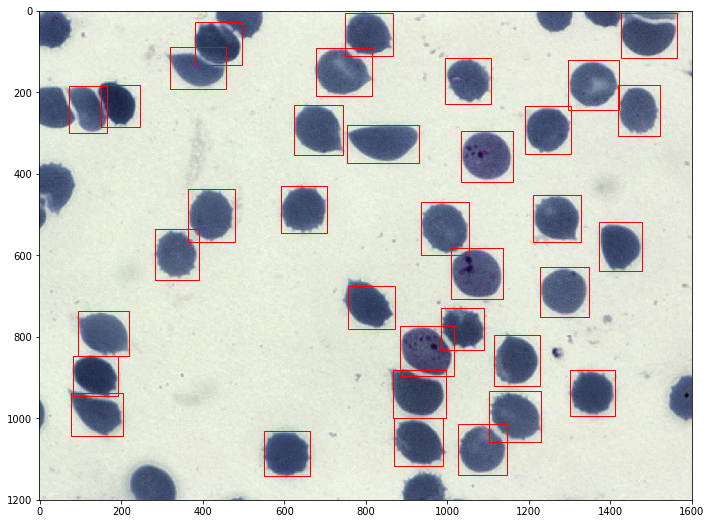

In [3]:
(target_bounding_boxes, target_image, target_scores, _), _ = generator.next()

target_bounding_boxes = np.squeeze(target_bounding_boxes)
target_image = np.squeeze(target_image)
target_scores = np.argmax(target_scores, -1)
target_scores = np.squeeze(target_scores)

_, axis = plt.subplots(1, figsize=(12, 9))
axis.imshow(target_image)

for target_index, target_score in enumerate(target_scores):
    if target_score > 0:
        xy = [
            target_bounding_boxes[target_index][0],
            target_bounding_boxes[target_index][1]
        ]

        w = target_bounding_boxes[target_index][2] - target_bounding_boxes[target_index][0]
        h = target_bounding_boxes[target_index][3] - target_bounding_boxes[target_index][1]

        rectangle = matplotlib.patches.Rectangle(xy, w, h, edgecolor="r", facecolor="none")

        axis.add_patch(rectangle)

plt.show()

In [4]:
import keras

In [5]:
image = keras.layers.Input((None, None, 3))
model = rcnn.models.RCNN(image, classes=len(classes) + 1)

In [7]:
optimizer = keras.optimizers.Adam(0.0001)
model.compile(optimizer)
model.fit_generator(generator)

/home/glenchao/git/keras-rcnn/keras_rcnn/models/_rcnn.py:91: UserWarning: Output "object_detection_1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "object_detection_1" during training.
  super(RCNN, self).compile(optimizer, None)
/usr/local/lib/python3.5/dist-packages/tensorflow/python/ops/gradients_impl.py:97: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/1
791/791 [==============================] - 490s 619ms/step - loss: 1.1302


In [47]:
pred = model.predict_generator(validation_data)

In [55]:
(val_data), _ = validation_data.next();
val_boxes, val_image, val_scores, val_sth = val_data
boxes, scores = model.predict(val_data)

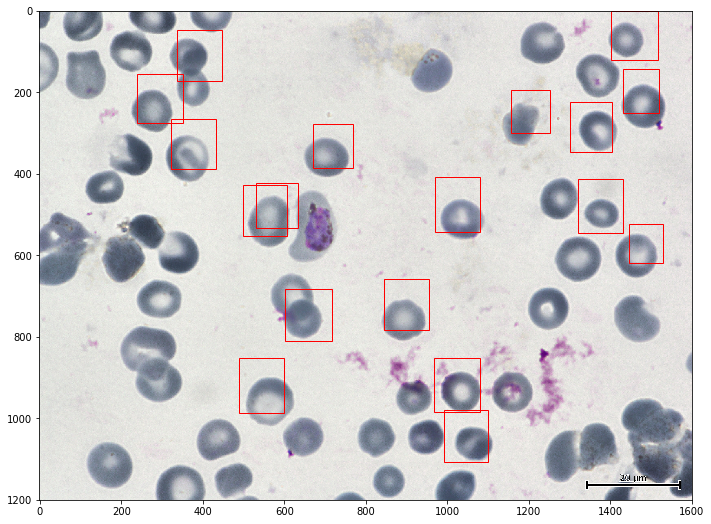

In [56]:
# (target_bounding_boxes, target_image, target_scores, _), _ = validation_data.next()

boxes = np.squeeze(boxes)
val_image = np.squeeze(val_image)
scores = np.argmax(scores, -1)
scores = np.squeeze(scores)

_, axis = plt.subplots(1, figsize=(12, 9))
axis.imshow(val_image)

for index, score in enumerate(scores):
    if score > 0:
        xy = [
            boxes[index][0],
            boxes[index][1]
        ]

        w = boxes[index][2] - boxes[index][0]
        h = boxes[index][3] - boxes[index][1]

        rectangle = matplotlib.patches.Rectangle(xy, w, h, edgecolor="r", facecolor="none")

        axis.add_patch(rectangle)

plt.show()